# Logistic Regression

Logistic regression can be used to classify instances into different classes by modelling the probability of a certain class or event existing e.g. win/lose, 1/0 etc. In this notebook we take a look at the fundamentals behind logistic regression. 

We look at the case of two classes, positive and negative, corresponding to the outputs $y=1$ and $y=0$.

### Configure notebook

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)

In [2]:
# Import code from src
sys.path.insert(0, '../src/')
from setup import fig_path

## The Sigmoid Function

In linear regression the output is the weighted sum of inputs. In logistic regression the output is not the weighted sum directly, we rather pass it through an **activation function** that can map any real value between 0 and 1. The activation function is known as the **sigmoid** (or **logit**) function, and is given by

\begin{equation}
    \sigma (t) = \frac{1}{1+ e^{-t}}
\end{equation}

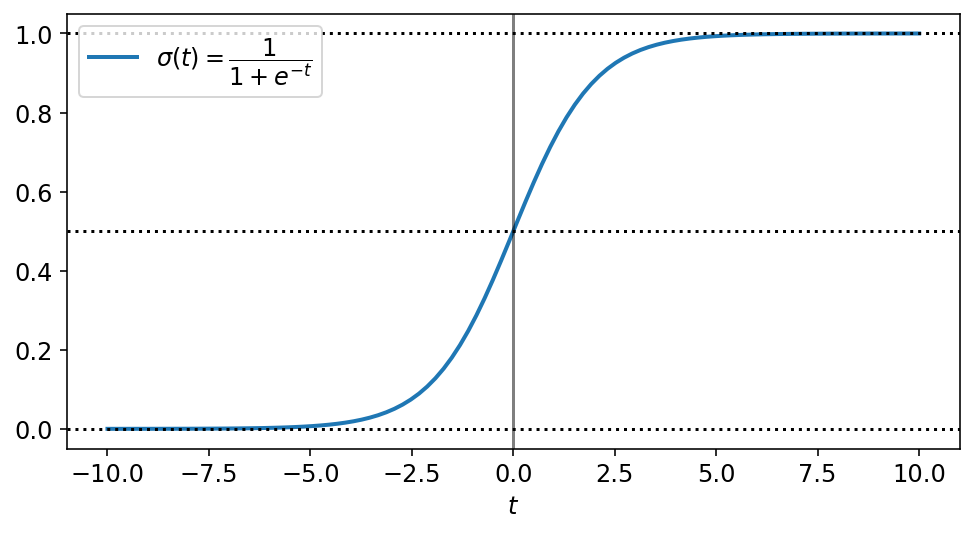

In [3]:
def logistic_func(t):
    return 1 / (1 + np.exp(-t))

t = np.linspace(-10, 10, 100)
fig = plt.figure(figsize=(8, 4))
plt.plot(t, logistic_func(t), lw=2)
plt.axhline(0, ls=':', color='k')
plt.axhline(0.5, ls=':', color='k')
plt.axhline(1, ls=':', color='k')
plt.axvline(0, ls='-', color='k', alpha=0.5)
plt.xlabel('$t$')
plt.legend(['$\\sigma(t)=\\dfrac{1}{1+e^{-t}}$'], loc='upper left')
fig.savefig(fig_path('logistic_function.pdf'))
plt.show()

As seen in the figure, the value of the sigmoid function always lies between 0 and 1. The value is exactly 0.5 at $t=0$. Thus, 0.5 can be used as the probability threshold, $p$, to determine the classes. If $p \geq 0.5$ the instance $t$ belongs to the positive class ($y = 1$), or else we classify it as the negative class ($y = 0$).

## The Logistic Regression Model

A linear regression model can be represented by

\begin{equation}
    y = \beta^T X
\end{equation}

The logistic regression models estimated probability is then

\begin{equation}
    \hat{p} = \sigma (\beta^T X),
\end{equation}

and the logistic regression model prediction is hence

\begin{equation}
\hat{y} = \begin{cases} 0 \quad \text{if } \hat{p} < 0.5 \\ 1 \quad \text{if } \hat{p} \geq 0.5 \end{cases} 
\end{equation}

## The Cost Function

Like for linear regression, we define a cost for our model and the objective will be to minimize the cost.

The cost function of a single training instance can be given by

\begin{equation}
    C(\beta) = \begin{cases} - \log(\hat{p}) &\quad \text{if } y=1 \\ - \log(1-\hat{p}) &\quad \text{if } y=0  \end{cases}
\end{equation}

To show that this cost function makes sense, we plot a simplified version with $t=\beta^T X$ below.

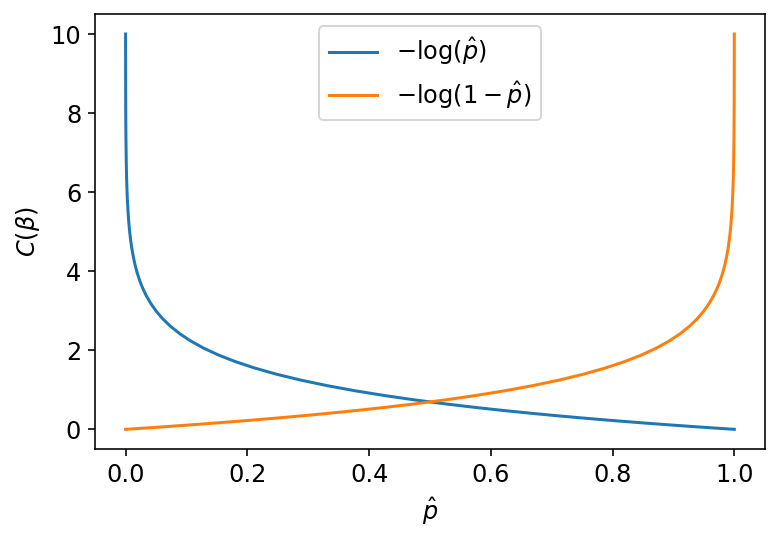

In [4]:
def cost_func_class_pos(t):
    return - np.log(logistic_func(t))

def cost_func_class_neg(t):
    return - np.log(1 - logistic_func(t))

t = np.linspace(-10, 10, 100)

plt.plot(logistic_func(t), cost_func_class_pos(t))
plt.plot(logistic_func(t), cost_func_class_neg(t))
plt.xlabel('$\hat{p}$')
plt.ylabel('$C(\\beta)$')
plt.legend(['$-\log(\hat{p})$', '$-\log(1-\hat{p})$'])
fig.savefig(fig_path('logistic_cost_func.pdf'))
plt.show()

The objective of the cost function is to heavily penalize the model if it predicts a negative class ($y=0$) if the acual class is positve ($y=1$) and vice-versa. 

As seen in the above figure, for $C(\beta) = - \log(\hat{p})$ the cost nears 0 as $\hat{p}$ approaches 1 and as $\hat{p}$ nears 0 the cost goes toward infinity (that is, we penalize the model heavily). Similarly, for $C(\beta) = - \log(1 - \hat{p})$, when the actual value is 0 and the model predicts 0, the cost is 0, an the cost goes toward infinity as $\hat{p}$ approaches 1.